<a href="https://colab.research.google.com/github/jay2jaykp/operation-odessa/blob/dev1/operation_odessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Kaggle API Key](https://medium.com/analytics-vidhya/using-the-kaggle-api-to-import-datasets-into-google-colaboratory-3ce56fb6ced0)

Click above link and follow set of instructions to authenticate kaggle-api for automated kaggle competition workflow.

1.   Generate kaggle api & download to local machine 
2.   Hit the `Choose Files` button below to authenticate 






In [ ]:
#upload kaggle.json into Google Colab environemnt
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"claudiolau","key":"af61c483b256e1c9379edf8629b750b4"}'}

In [ ]:
%%html
<iframe style="border: 1px solid rgba(0, 0, 0, 0.1);" width="1000" height="600" src="https://www.figma.com/embed?embed_host=share&url=https%3A%2F%2Fwww.figma.com%2Ffile%2FKkR26Yvur3qfJhlbT5643m%2FUntitled%3Fnode-id%3D102%253A501" allowfullscreen></iframe>

# Kaggle Config

Run Linux and pip commands to create directory and install libraries to run in Google Colab Environment. 

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json #owner permission
!kaggle config path -p /content # accept terms & conditions https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting -p 'walmart-recruiting-store-sales-forecasting'

kaggle.json
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 33.6MB/s]
  0% 0.00/532 [00:00<?, ?B/s]
100% 532/532 [00:00<00:00, 449kB/s]
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 47.9MB/s]
  0% 0.00/2.47M [00:00<?, ?B/s]
100% 2.47M/2.47M [00:00<00:00, 81.1MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.6MB/s]


# Dependancies

Restart local variables b/c of pyunpack dependancy if required.

In [ ]:
### unzip
!pip install pyunpack
!pip install patool

### web-microframework 
!pip install flask-ngrok

     |████████████████████████████████| 81kB 4.8MB/s 


### Requirements Text

In [ ]:
!pip freeze > requirements.txt

# Libraries

In [ ]:
 import os
 from pathlib import Path
 import seaborn as sns
 from pyunpack import Archive
 import pandas as pd
 from functools import reduce

# Module

### Data Congestion Pipeline 

In [ ]:
file_dir = "/walmart-recruiting-store-sales-forecasting" # get the current working directory

In [ ]:
class data_congestion: 
  """ Pipeline to handle data conversion and summary metrics.
  """
  def __init__(self,  file_dir, file_ext):
    """Connects to file directory.
    Args:
      file_dir: A string identifying the location.
      file_ext: A string identifying the file 
    """
    self.file_path = os.getcwd() + file_dir # assign file path
    self.file_ext = file_ext # set file extension

  def get_path(self): 
    """Connects to file directory.
    Args:
      file_dir: A string identify the location.
    Returns the set file path. 
    """
    return self.file_path

  def get_zip_files(self):
    """ Extract zip files into csv files. And remove all existing zip files.
    """
    os.chdir(self.file_path)
    for csv_file in os.listdir(self.file_path):
      if csv_file.endswith(self.file_ext):
        Archive(csv_file).extractall('.')
        os.remove(csv_file)
    os.chdir('/content')
  
  def get_df(self): 
    """ Return summary of dataframes in file_path.
    """
    os.chdir(self.file_path)
    for df_ in os.listdir():
      print(df_)
      df = pd.read_csv(df_)
      print(df.describe())
      print(df.info())
      print(df.head())
    os.chdir('/content')

### Data Exploration

In [ ]:
class data_exploration: 
  """
  """
  def __init__(self, file_dir, *dfs, test, join):
    """ Merge data sources and preprocessing 
    """
    self.file_path = os.getcwd() + file_dir
    self.dfs = dfs  
    filenames = [self.file_path + '/' + i for i in self.dfs]

    ## merges args
    if len(filenames) ==0: 
      first_df = pd.read_csv(filenames)
    else:
      first_df = pd.read_csv(filenames[0])
      for i in filenames[1:]:
        first_df = first_df.merge(pd.read_csv(i), how= join)
    self.df = first_df

  def get_null(self): 
    """
    """
    return self.df.isnull().sum()
  def get_remove(self, *col):
    """
    """
   def get_parse_date(self):
    """
    """
    self.df.Date = pd.to_datetime(self.df.Date)
    self.df.set_index(keys = "Date", inplace = True)
    return self.df

  def get_types(self):
    """
    """
    return self.df.dtypes

  def get_scatter(self, y):
    ax = sns.scatterplot(x = self.df.index , y =self.df[y], data = self.df)
    ax.set(xlabel='Date', ylabel=y)

  def get_boxplot(self, x): 
    sns.boxplot(x = self.df[x]);

  def get_heatmap(self): 
    sns.heatmap(self.df.corr(), vmin = -1, vmax = 1, annot = True)

SyntaxError: ignored

## Timeseries Model

## ML Model 

## DL Model

# Scripts

In [ ]:
start_data = data_congestion(file_dir, '.zip')
start_data.get_zip_files()
start_data.get_df()

features.csv
             Store  Temperature  ...          CPI  Unemployment
count  8190.000000  8190.000000  ...  7605.000000   7605.000000
mean     23.000000    59.356198  ...   172.460809      7.826821
std      12.987966    18.678607  ...    39.738346      1.877259
min       1.000000    -7.290000  ...   126.064000      3.684000
25%      12.000000    45.902500  ...   132.364839      6.634000
50%      23.000000    60.710000  ...   182.764003      7.806000
75%      34.000000    73.880000  ...   213.932412      8.567000
max      45.000000   101.950000  ...   228.976456     14.313000

[8 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032

In [ ]:
clean_df =data_exploration(file_dir, 'train.csv', 'features.csv','stores.csv', test="test.csv", join='left')
# clean_df.get_parse_date()
# print(clean_df.get_null())
# print(clean_df.get_types())
clean_df.df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


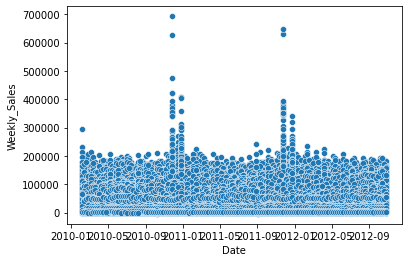

In [ ]:
clean_df.get_scatter('Weekly_Sales')

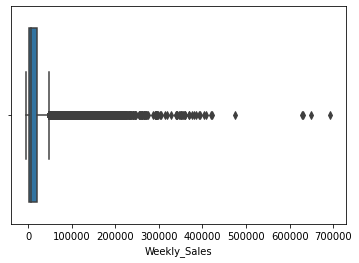

In [ ]:
clean_df.get_boxplot('Weekly_Sales')

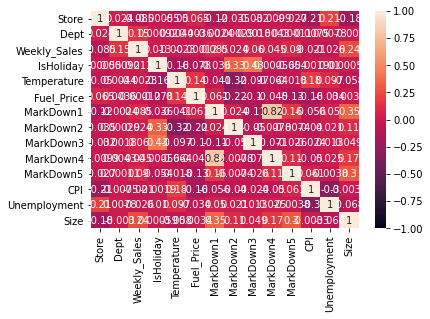

In [ ]:
clean_df.get_heatmap()

## Stacking & Blending Model

## Logging & Benchmarking 